## Normalization
The data used in this notebook is lymphocyte data for one patient's B cells and T cells. Here we plot the runs to determine the need for normalization and test normalization techniques.

First, we import our loader module. This brings the functions defined there (in our repository at ~/load_data.py) into scope so we can use them in this script. Then we can load our data and store it as <code>data_raw</code>.

In [1]:
import load_data
data_raw = load_data.load_max_quant()

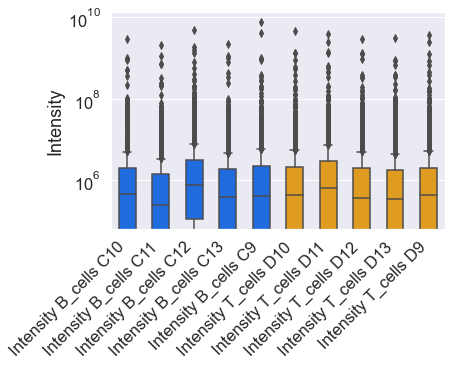

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
colors = ["#0066ff","#0066ff","#0066ff","#0066ff","#0066ff","orange","orange","orange","orange", "orange"]
sns.set(font_scale=1.5)
figure = sns.boxplot(data=data_raw, width=.5, palette=colors)
figure.set_ylabel("Intensity")
figure.set_yscale("log")
plt.setp(figure.get_xticklabels(), rotation=45,horizontalalignment='right')

plt.show()

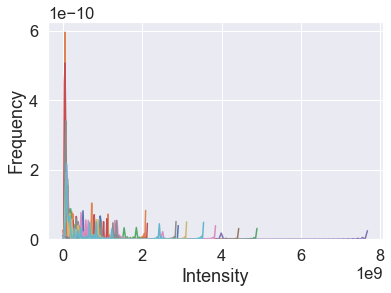

In [11]:
def dist(ser):
    f=sns.distplot(ser, hist=False)
    f.set_xlabel("Intensity")
    f.set_ylabel("Frequency")
    
data_raw.apply(dist)
plt.show()

Global median normalization
https://datascienceplus.com/proteomics-data-analysis-2-3-data-filtering-and-missing-value-imputation/

In [4]:
from numpy import nan
from numpy import log2
from statistics import median

In [5]:
data_log2 = log2(data_raw.replace(0,nan))
data_log2_medNorm = data_log2.apply(lambda series: series-median(series.dropna()))

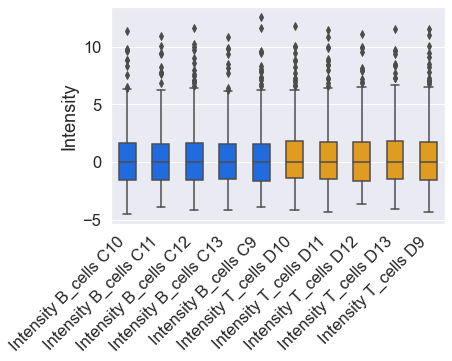

In [6]:
figure = sns.boxplot(data=data_log2_medNorm, width=.5, palette=colors)
figure.set_ylabel("Intensity")
plt.setp(figure.get_xticklabels(), rotation=45,horizontalalignment='right')

plt.show()

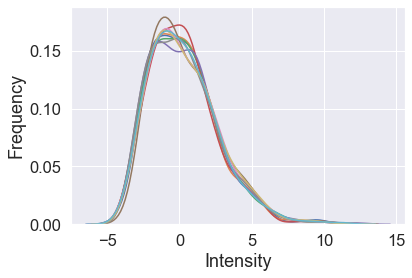

In [12]:
data_log2_medNorm.apply(dist)
plt.show()

The global median normalization works well with this data. The dataset is now log2 and scaled to zero.

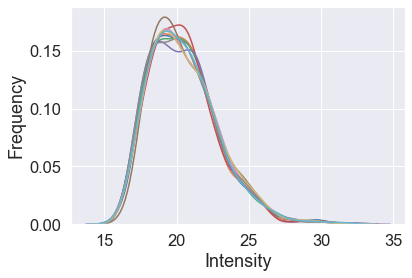

In [20]:
medians = data_log2.apply(lambda series: median(series.dropna()))
global_median = median(medians.dropna())
data_normalized = data_log2.apply(lambda series: series-median(series.dropna())+global_median)
data_normalized.apply(dist)
plt.show()

Here, the data is centered at the global median instead of 0.